In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r'C:\Users\ilahi\Downloads\customer_segmentation_data.csv')
df




,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [3]:
# Check for missing values
df.isnull().sum()

# Option 1: Drop rows/columns with missing values
df.dropna(inplace=True)

In [4]:
# Drop the 'id' column
df.drop('id', axis=1, inplace=True)


In [5]:
# One-Hot Encoding for 'gender' and 'preferred_category'
df_encoded = pd.get_dummies(df, columns=['gender', 'preferred_category'], drop_first=True)

# Check the transformed data
df_encoded.head()


,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,38,99342,90,3,24,113.53,False,False,False,True,False,False
1,21,78852,60,2,42,41.93,False,False,False,False,False,True
2,60,126573,30,2,28,424.36,False,False,False,False,False,False
3,40,47099,74,9,5,991.93,False,True,False,False,True,False
4,65,140621,21,3,25,347.08,False,False,True,False,False,False


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the entire dataset
df_scaled = scaler.fit_transform(df_encoded)


D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

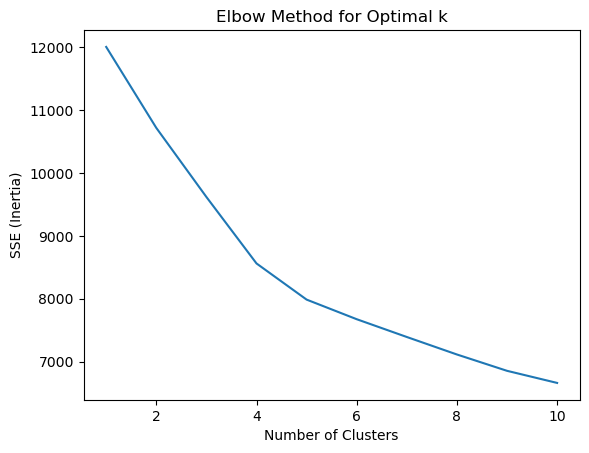

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find the optimal number of clusters
sse = []  # Sum of squared distances

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [8]:
# Apply K-Means with optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Check the cluster assignments
df.head()


D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,Cluster
0,38,Female,99342,90,3,24,Groceries,113.53,1
1,21,Female,78852,60,2,42,Sports,41.93,1
2,60,Female,126573,30,2,28,Clothing,424.36,1
3,40,Other,47099,74,9,5,Home & Garden,991.93,2
4,65,Female,140621,21,3,25,Electronics,347.08,0


In [9]:
# Group by clusters, but only apply the mean function to numeric columns
df_numeric = df.select_dtypes(include=[float, int])
df.groupby('Cluster')[df_numeric.columns].mean()


,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,Cluster
Cluster,,,,,,,
0,43.079070,89111.339535,50.297674,5.804651,26.427907,496.632279,0.0
1,44.198618,88131.875648,51.379965,5.431779,26.709845,486.043178,1.0
2,43.349515,88900.514563,49.135922,5.223301,26.451456,505.600631,2.0


In [10]:
# Group by clusters, but only apply the mean function to numeric columns
df_numeric = df.select_dtypes(include=[float, int])
df.groupby('Cluster')[df_numeric.columns].mean()


,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,Cluster
Cluster,,,,,,,
0,43.079070,89111.339535,50.297674,5.804651,26.427907,496.632279,0.0
1,44.198618,88131.875648,51.379965,5.431779,26.709845,486.043178,1.0
2,43.349515,88900.514563,49.135922,5.223301,26.451456,505.600631,2.0


In [11]:
df['Cluster'].value_counts()


Cluster
1    579
0    215
2    206
Name: count, dtype: int64

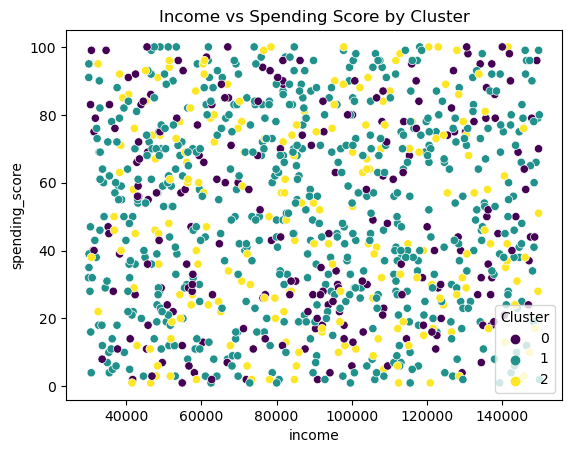

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='income', y='spending_score', hue='Cluster', data=df, palette='viridis')
plt.title('Income vs Spending Score by Cluster')
plt.show()


D:\Users\ilahi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


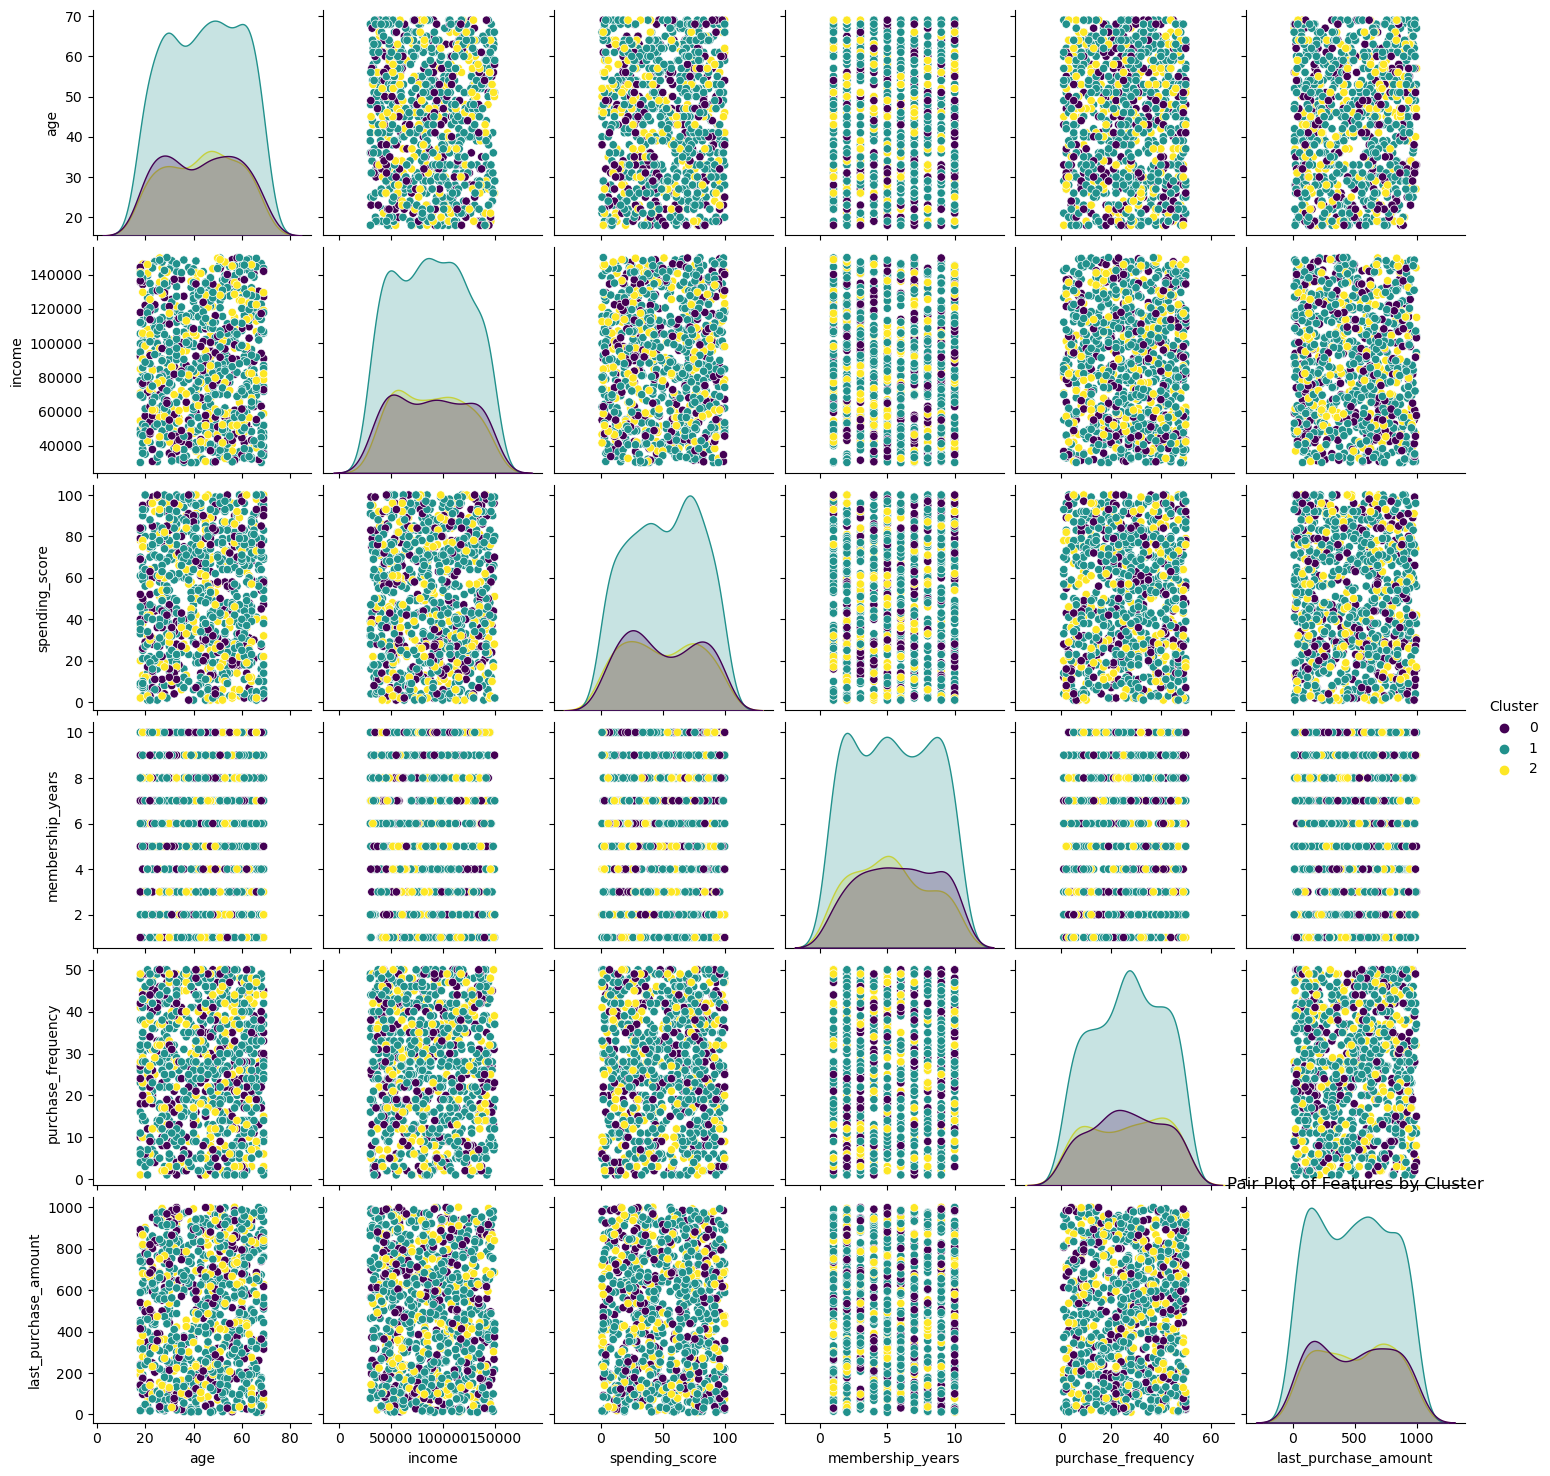

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.title('Pair Plot of Features by Cluster')
plt.show()


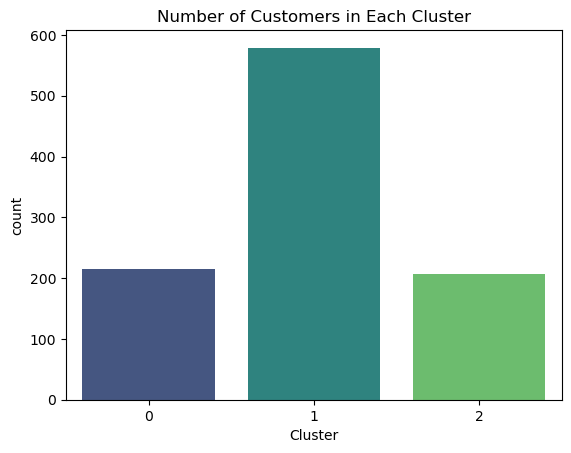

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.show()


D:\Users\ilahi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


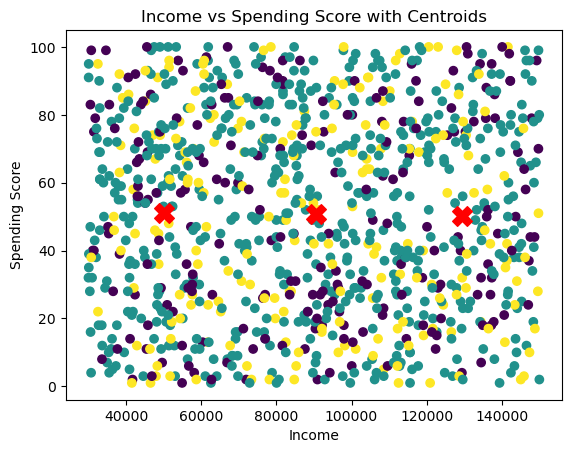

In [16]:
from sklearn.cluster import KMeans

# Assuming you used KMeans for clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['income', 'spending_score']])
centroids = kmeans.cluster_centers_

plt.scatter(df['income'], df['spending_score'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200) # plot centroids
plt.title('Income vs Spending Score with Centroids')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()
